In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [2]:
stock_price = pd.read_csv('^BSESN.csv')

In [3]:
stock_headlines = pd.read_csv('india-news-headlines.csv')

In [4]:
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-12,34472.500000,34472.500000,32493.099609,32778.140625,32778.140625,25200.0
1,2020-03-13,31214.130859,34769.480469,29388.970703,34103.480469,34103.480469,32600.0
2,2020-03-16,33103.238281,33103.238281,31276.300781,31390.070313,31390.070313,18100.0
3,2020-03-17,31611.570313,32047.980469,30394.939453,30579.089844,30579.089844,21500.0
4,2020-03-18,30968.839844,31101.769531,28613.050781,28869.509766,28869.509766,31300.0


In [5]:
stock_price['Date'] = pd.to_datetime(stock_price['Date'])
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       249 non-null    float64       
 2   High       249 non-null    float64       
 3   Low        249 non-null    float64       
 4   Close      249 non-null    float64       
 5   Adj Close  249 non-null    float64       
 6   Volume     249 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [6]:
stock_price = stock_price.drop_duplicates()
stock_price.dropna(axis=0, inplace=True)

In [7]:
train = stock_price[:200]
test = stock_price[200:]

In [8]:
    
train_log = np.log(train['Close'])
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean()

train_log.dropna(inplace = True)
test_log.dropna(inplace = True)
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)



In [9]:
!pip install pmdarima

In [10]:
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-978.107, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-967.606, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-969.827, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-970.400, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-968.010, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-967.016, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-974.577, Time=0.91 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-971.809, Time=1.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-969.901, Time=1.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-968.661, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-972.284, Time=0.87 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-965.404, Time=0.49 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-970.489, Time=1.26 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-964.762, Time=0.52 sec

Best model:  ARIMA(2,1,2)(0,0,0)

Text(0, 0.5, 'Actual Stock Price')

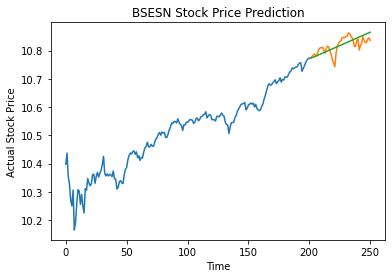

In [11]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [12]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.023383768650960823


In [13]:
stock_headlines

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [14]:
stock_headlines.drop('headline_category', axis = 1, inplace=True)
stock_headlines['publish_date'] = pd.to_datetime(stock_headlines['publish_date'],format= '%Y%m%d')
stock_headlines

,publish_date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa
...,...,...
3297167,2020-06-30,why tiktok removed 1 65 crore videos in india
3297168,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297169,2020-06-30,kangana ranaut gets a doll version of herself ...
3297170,2020-06-30,meezaan jaffrey reminisces his childhood days ...


In [15]:
stock_headlines = stock_headlines.filter(['publish_date', 'headline_text'])

In [16]:
stock_headlines = stock_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

# setting Date as the index column
stock_headlines.set_index('publish_date', inplace= True)

# sorting the data according to the Date
stock_headlines = stock_headlines.sort_index(ascending=True, axis=0)
stock_headlines

,headline_text
publish_date,
2001-01-01,win over cena satisfying but defeating underta...
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
...,...
2020-06-26,Containment zone residents slam high prices ch...
2020-06-27,like me i wont let you have a toxic relationsh...
2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...


In [17]:
stock_price = stock_price.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])

stock_price.set_index('Date', inplace= True)

stock_price = stock_price.sort_index(ascending=True, axis=0)
stock_data = pd.concat([stock_price, stock_headlines], axis=1)

stock_data.dropna(axis=0, inplace=True)


stock_data

,Close,Open,High,Low,Volume,headline_text
2020-03-12,32778.140625,34472.500000,34472.500000,32493.099609,25200.0,If we defeat its fear; cancer too can be defea...
2020-03-13,34103.480469,31214.130859,34769.480469,29388.970703,32600.0,'The She Fest 2020' focuses on women's empower...
2020-03-16,31390.070313,33103.238281,33103.238281,31276.300781,18100.0,"An ode to the tawaifs of Bollywood,whats the u..."
2020-03-17,30579.089844,31611.570313,32047.980469,30394.939453,21500.0,Two taken into preventive custody for spreadin...
2020-03-18,28869.509766,30968.839844,31101.769531,28613.050781,31300.0,FDA warns against charging excess for masks; s...
...,...,...,...,...,...,...
2020-06-24,34868.980469,35679.738281,35706.550781,34794.929688,26600.0,I never thought I had a voice until today: Vid...
2020-06-25,34842.101563,34525.390625,35081.609375,34499.781250,24600.0,Truck firms look for new export markets to sel...
2020-06-26,35171.269531,35144.781250,35254.878906,34910.339844,24800.0,Containment zone residents slam high prices ch...
2020-06-29,34961.519531,34926.949219,35032.359375,34662.058594,18300.0,6 hot and stylish bikini looks of Katrina Kaif...


In [18]:
!pip install -U textblob

Requirement already up-to-date: textblob in c:\users\abhisek\anaconda3\envs\deeplearning\lib\site-packages (0.15.3)


In [19]:
from textblob import TextBlob


In [20]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [22]:
stock_data['Subjectivity'] = stock_data['headline_text'].apply(getSubjectivity)
stock_data['Polarity'] = stock_data['headline_text'].apply(getPolarity)
stock_data

,Close,Open,High,Low,Volume,headline_text,Subjectivity,Polarity
2020-03-12,32778.140625,34472.500000,34472.500000,32493.099609,25200.0,If we defeat its fear; cancer too can be defea...,0.417701,0.004972
2020-03-13,34103.480469,31214.130859,34769.480469,29388.970703,32600.0,'The She Fest 2020' focuses on women's empower...,0.391466,0.031538
2020-03-16,31390.070313,33103.238281,33103.238281,31276.300781,18100.0,"An ode to the tawaifs of Bollywood,whats the u...",0.346789,0.031985
2020-03-17,30579.089844,31611.570313,32047.980469,30394.939453,21500.0,Two taken into preventive custody for spreadin...,0.369559,0.032420
2020-03-18,28869.509766,30968.839844,31101.769531,28613.050781,31300.0,FDA warns against charging excess for masks; s...,0.379277,0.054602
...,...,...,...,...,...,...,...,...
2020-06-24,34868.980469,35679.738281,35706.550781,34794.929688,26600.0,I never thought I had a voice until today: Vid...,0.372516,0.097046
2020-06-25,34842.101563,34525.390625,35081.609375,34499.781250,24600.0,Truck firms look for new export markets to sel...,0.401447,0.023291
2020-06-26,35171.269531,35144.781250,35254.878906,34910.339844,24800.0,Containment zone residents slam high prices ch...,0.381825,0.084044
2020-06-29,34961.519531,34926.949219,35032.359375,34662.058594,18300.0,6 hot and stylish bikini looks of Katrina Kaif...,0.379891,0.052443


In [25]:
import nltk

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()

stock_data['Compound'] = [analyzer.polarity_scores(v)['compound'] for v in stock_data['headline_text']]
print('Compound Done')
stock_data['Negative'] = [analyzer.polarity_scores(v)['neg'] for v in stock_data['headline_text']]
print('Negative Done')
stock_data['Neutral'] = [analyzer.polarity_scores(v)['neu'] for v in stock_data['headline_text']]
print('Neutral Done')
stock_data['Positive'] = [analyzer.polarity_scores(v)['pos'] for v in stock_data['headline_text']]
print('Positive Done')
stock_data

Compound Done
Negative Done
Neutral Done
Positive Done


,Close,Open,High,Low,Volume,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
2020-03-12,32778.140625,34472.500000,34472.500000,32493.099609,25200.0,If we defeat its fear; cancer too can be defea...,0.417701,0.004972,-1.0000,0.197,0.728,0.075
2020-03-13,34103.480469,31214.130859,34769.480469,29388.970703,32600.0,'The She Fest 2020' focuses on women's empower...,0.391466,0.031538,-0.9999,0.169,0.752,0.080
2020-03-16,31390.070313,33103.238281,33103.238281,31276.300781,18100.0,"An ode to the tawaifs of Bollywood,whats the u...",0.346789,0.031985,-0.9999,0.151,0.803,0.046
2020-03-17,30579.089844,31611.570313,32047.980469,30394.939453,21500.0,Two taken into preventive custody for spreadin...,0.369559,0.032420,-1.0000,0.199,0.734,0.068
2020-03-18,28869.509766,30968.839844,31101.769531,28613.050781,31300.0,FDA warns against charging excess for masks; s...,0.379277,0.054602,-0.9999,0.133,0.819,0.048
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,34868.980469,35679.738281,35706.550781,34794.929688,26600.0,I never thought I had a voice until today: Vid...,0.372516,0.097046,-0.9997,0.116,0.809,0.075
2020-06-25,34842.101563,34525.390625,35081.609375,34499.781250,24600.0,Truck firms look for new export markets to sel...,0.401447,0.023291,-0.9999,0.131,0.814,0.055
2020-06-26,35171.269531,35144.781250,35254.878906,34910.339844,24800.0,Containment zone residents slam high prices ch...,0.381825,0.084044,-0.9999,0.150,0.766,0.084
2020-06-29,34961.519531,34926.949219,35032.359375,34662.058594,18300.0,6 hot and stylish bikini looks of Katrina Kaif...,0.379891,0.052443,-0.9997,0.121,0.799,0.080


In [27]:
stock_data1 = stock_data[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
stock_data2 = pd.DataFrame(sc.fit_transform(stock_data1))
stock_data2.columns = stock_data1.columns
stock_data2.index = stock_data1.index
stock_data2.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
2020-03-12,0.719310,0.665742,0.000000,0.000000,0.983871,0.000000,0.491525
2020-03-13,0.859570,0.419436,0.240292,0.003333,0.758065,0.172662,0.576271
2020-03-16,0.572412,0.000000,0.244337,0.003333,0.612903,0.539568,0.000000
2020-03-17,0.486587,0.213770,0.248273,0.000000,1.000000,0.043165,0.372881
2020-03-18,0.305663,0.305007,0.448907,0.003333,0.467742,0.654676,0.033898


In [29]:
X = stock_data2.drop('Close', axis=1)
y =stock_data2['Close']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(58, 6)

In [35]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [36]:
print(mean_squared_error(prediction,y_test))

0.060608352992889095
